## Proyecto integrador


In [1]:
#pip install clean-text

In [16]:
from cleantext import clean
from sklearn.feature_extraction.text import TfidfVectorizer
import ftfy
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from datetime import datetime

### Lectura de datos

In [3]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv('Data/Busqueda_1.csv', encoding='ISO-8859-1')  # Usamos la codificación ISO-8859-1 que es común para archivos CSV con errores de codificación

df

,ASIN,Product Name,Brand,Category,Est. Monthly Revenue,Est. Monthly Sales,Price,Fees,Net,Rank,Reviews,LQS,Sellers,Date First Available,Buy Box Owner,Rating,Dimensions,Product Tier,Weight
0,B0BY7R11JB,Rebar-Stakes-12-Inch-Galvanized J Hook Rebar ...,QNLONG,"Patio, Lawn & Garden","$15,001.20","1,080",$13.89,N.A.,N.A.,"1,381",43.000000,6,1,05/27/2023,Amazon,4.8,N.A.,N.A.,N.A.
1,B0BYZPBF3L,CozeCube Light Beige Bath mats for Bathroom No...,CozeCube,Home & Kitchen,"$15,001.35","1,365",$24.99,N.A.,N.A.,"23,336",43.135135,7,2,03/19/2023,taianshiyujiadianzishangmaoyouxiangongsi,3.9,N.A.,N.A.,N.A.
2,B0C3GRT1Q3,PURPLE LADYBUG Scratch Art for Kids - Party Fa...,PURPLE LADYBUG,Toys & Games,"$15,004.31","1,669",$8.99,N.A.,N.A.,"7,824",5.000000,6,1,06/28/2023,Amazon,5.0,N.A.,N.A.,N.A.
3,B0CL9X56BK,Cordless Long Handle Replacement Brush Heads f...,Bilim,Health & Household,"$15,004.98","1,502",$9.99,N.A.,N.A.,N.A.,21.000000,5,1,06/18/2023,Amazon,5.0,N.A.,N.A.,N.A.
4,B0C1FY79XG,Fitwarm Cheerleader Dog Costume Sporty Cheer ...,Fitwarm,Pet Supplies,"$15,004.99","1,001",$14.99,$5.79,$9.20,"5,053",30.000000,6,1,04/03/2023,Amazon,4.3,"12.87"" x 9.80"" x 0.87""",Large standard-size,2.4 lbs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10199,B0CHMK5L2R,INPAKSA Women's Slippers Platform Mini Boots S...,INPAKSA,"Clothing, Shoes & Jewelry","$520,217.72","11,314",$45.98,N.A.,N.A.,"1,113",32.000000,7,1,09/07/2023,INPAKSAS,3.9,N.A.,N.A.,N.A.
10200,B07QQX6JVL,SEPARO Spandex Table Cover Fitted Rectangular ...,SEPARO,Kitchen & Dining,"$520,702.56","9,648",$53.97,N.A.,N.A.,524,2.000000,7,1,06/24/2023,Amazon,5.0,N.A.,N.A.,N.A.
10201,B0BLJJNFYN,HYC00 Travel Duffel Bag Sports Tote Gym/Should...,HYC00,"Clothing, Shoes & Jewelry","$520,906.40","13,360",$38.99,$12.58,$26.41,"74,253",12.000000,7,3,12/17/2022,Amazon Warehouse,4.4,"12.99"" x 10.28"" x 4.33""",Large standard-size,2.05 lbs
10202,B0CFKGY6XH,FREE VILLAGE Ice Makers Countertop Nugget Cube...,FREE VILLAGE,Appliances,"$521,539.94","2,006",$259.99,N.A.,N.A.,"2,907",10.000000,7,1,08/15/2023,progressUS,3.5,"11.30"" x 8.66"" x 12.68""",N.A.,N.A.


## Limpieza de lso datos

In [4]:
df = df.drop_duplicates(subset='ASIN')

In [5]:
df = df.drop(columns=['ASIN', 'Rank', 'Fees', 'Net', 'Dimensions', 'Product Tier', 'Weight', 'Buy Box Owner' ])

In [6]:
import pandas as pd
import ftfy

# Función para limpiar texto
def clean_text(text):
    fixed_text = ftfy.fix_text(text)
    cleaned_text = clean(fixed_text, 
                         fix_unicode=True,
                         to_ascii=True,
                         no_line_breaks=True,
                         no_urls=True,
                         no_emails=True,
                         no_phone_numbers=True,
                         no_numbers=False,
                         no_digits=False,
                         no_currency_symbols=True,
                         no_punct=True,
                         replace_with_punct="",
                         lang="en")
    return cleaned_text

text_columns = ['Product Name', 'Brand', 'Category']

# Verificar valores faltantes
for col in text_columns:
    df[col] = df[col].astype(str).apply(clean_text)

    
df.replace("N.A.", np.nan, inplace=True)
df.replace("na", np.nan, inplace=True)


In [7]:
# Verificar valores faltantes
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Product Name             0
Brand                    3
Category                 0
Est. Monthly Revenue    53
Est. Monthly Sales      53
Price                    0
Reviews                  0
LQS                      0
Sellers                  0
Date First Available     0
Rating                   0
dtype: int64


## Cambiar tipos de datos

In [8]:
print(df.dtypes)

Product Name             object
Brand                    object
Category                 object
Est. Monthly Revenue     object
Est. Monthly Sales       object
Price                    object
Reviews                 float64
LQS                       int64
Sellers                   int64
Date First Available     object
Rating                  float64
dtype: object


In [9]:
df['Rating'] = df['Rating'].round(2)
df = df.astype({'Reviews': 'float64', 'Reviews': 'int64'})

df['Est. Monthly Revenue'] = df['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
df['Est. Monthly Sales'] = df['Est. Monthly Sales'].str.replace(',', '')
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')

df['Est. Monthly Sales'] = pd.to_numeric(df['Est. Monthly Sales'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Est. Monthly Revenue'] = pd.to_numeric(df['Est. Monthly Revenue'], errors='coerce')

C:\Users\Chris\AppData\Local\Temp\ipykernel_20328\2324043937.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Est. Monthly Revenue'] = df['Est. Monthly Revenue'].str.replace('$', '').str.replace(',', '')
C:\Users\Chris\AppData\Local\Temp\ipykernel_20328\2324043937.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')


#### Caluclar tiempo en el mercado por producto

In [10]:
# Convertir la columna "Date First Available" a formato de fecha
df['Date First Available'] = pd.to_datetime(df['Date First Available'])
# Calcular cuánto tiempo ha estado en el mercado cada producto
today = datetime.today()
df['Time in Market (days)'] = (today - df['Date First Available']).dt.days

### drop NA

In [11]:
df = df.dropna(subset=['Est. Monthly Sales'])
df = df.dropna(subset=['Brand'])

In [12]:
# Verificar valores faltantes
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Product Name             0
Brand                    0
Category                 0
Est. Monthly Revenue     0
Est. Monthly Sales       0
Price                    0
Reviews                  0
LQS                      0
Sellers                  0
Date First Available     0
Rating                   0
Time in Market (days)    0
dtype: int64


### Ordenar columnas

In [13]:
# Si deseas reordenarlas, por ejemplo, para que 'Time in Market (days)' sea la segunda columna, haz lo siguiente:
ordered_columns = [
    'Product Name', 
    'Category', 
    'Brand', 
    'Reviews', 
    'LQS', 
    'Sellers', 
    'Date First Available', 
    'Time in Market (days)', 
    'Rating',
    'Price', 
    'Est. Monthly Sales',
    'Est. Monthly Revenue', 
]
df = df[ordered_columns]


In [14]:
#pd.set_option('display.max_rows', None)
#pd.set_option('max_colwidth', None)
df

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue
0,rebarstakes12inchgalvanized j hook rebar stake...,patio lawn garden,qnlong,43,6,1,2023-05-27,153,4.8,13.89,1080.0,15001.20
1,cozecube light beige bath mats for bathroom no...,home kitchen,cozecube,43,7,2,2023-03-19,222,3.9,24.99,1365.0,15001.35
2,purple ladybug scratch art for kids party favo...,toys games,purple ladybug,5,6,1,2023-06-28,121,5.0,8.99,1669.0,15004.31
3,cordless long handle replacement brush heads f...,health household,bilim,21,5,1,2023-06-18,131,5.0,9.99,1502.0,15004.98
4,fitwarm cheerleader dog costume sporty cheer d...,pet supplies,fitwarm,30,6,1,2023-04-03,207,4.3,14.99,1001.0,15004.99
...,...,...,...,...,...,...,...,...,...,...,...,...
9899,inpaksa womens slippers platform mini boots sh...,clothing shoes jewelry,inpaksa,32,7,1,2023-09-07,50,3.9,45.98,11314.0,520217.72
9900,separo spandex table cover fitted rectangular ...,kitchen dining,separo,2,7,1,2023-06-24,125,5.0,53.97,9648.0,520702.56
9901,hyc00 travel duffel bag sports tote gymshoulde...,clothing shoes jewelry,hyc00,12,7,3,2022-12-17,314,4.4,38.99,13360.0,520906.40
9902,free village ice makers countertop nugget cube...,appliances,free village,10,7,1,2023-08-15,73,3.5,259.99,2006.0,521539.94


### Extracción de Palabras Clave

### Agrupación 

In [27]:
def extract_top_keywords(tfidf_data, feature_names, top_n=10):
    """Extrae las top_n palabras clave para cada fila en tfidf_data."""
    keywords_list = []
    for row in tfidf_data:
        top_indices = row.toarray().argsort()[0, -top_n:][::-1]
        keywords = [feature_names[i] for i in top_indices]
        keywords_list.append(keywords)
    return keywords_list


In [28]:
# Preprocesamiento y Extracción de Palabras Clave
# Calcula la matriz TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['Product Name'])


# Obtener los nombres de las características (palabras) del vectorizador
feature_names = vectorizer.get_feature_names_out()

# Extraer las palabras clave más relevantes para cada fila en tfidf_matrix
df['Keywords'] = extract_top_keywords(tfidf_matrix, feature_names)

# Luego, aplica KMeans
num_clusters = 10
km = KMeans(n_clusters=num_clusters)
df['Cluster'] = km.fit_predict(tfidf_matrix)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
df

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue,Keywords,Cluster
0,rebarstakes12inchgalvanized j hook rebar stake...,patio lawn garden,qnlong,43,6,1,2023-05-27,153,4.8,13.89,1080.0,15001.20,"[stakes, turf, antirust, landscape, tent, grou...",1
1,cozecube light beige bath mats for bathroom no...,home kitchen,cozecube,43,7,2,2023-03-19,222,3.9,24.99,1365.0,15001.35,"[rugs, bath, bathroom, shag, area, mats, micro...",2
2,purple ladybug scratch art for kids party favo...,toys games,purple ladybug,5,6,1,2023-06-28,121,5.0,8.99,1669.0,15004.31,"[teen, crafts, ladybug, stuff, girls, scratch,...",9
3,cordless long handle replacement brush heads f...,health household,bilim,21,5,1,2023-06-18,131,5.0,9.99,1502.0,15004.98,"[dome, spin, adapter, heads, scrubber, corner,...",2
4,fitwarm cheerleader dog costume sporty cheer d...,pet supplies,fitwarm,30,6,1,2023-04-03,207,4.3,14.99,1001.0,15004.99,"[dog, sporty, cheer, cheerleader, outfits, pet...",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9899,inpaksa womens slippers platform mini boots sh...,clothing shoes jewelry,inpaksa,32,7,1,2023-09-07,50,3.9,45.98,11314.0,520217.72,"[boot, slippers, antislip, fur, lined, platfor...",7
9900,separo spandex table cover fitted rectangular ...,kitchen dining,separo,2,7,1,2023-06-24,125,5.0,53.97,9648.0,520702.56,"[tablecloth, wrinklefree, banquet, weddings, r...",1
9901,hyc00 travel duffel bag sports tote gymshoulde...,clothing shoes jewelry,hyc00,12,7,3,2022-12-17,314,4.4,38.99,13360.0,520906.40,"[bag, pocket, duffel, weekender, laptop, overn...",3
9902,free village ice makers countertop nugget cube...,appliances,free village,10,7,1,2023-08-15,73,3.5,259.99,2006.0,521539.94,"[ice, nugget, chewy, village, operation, selfc...",1


In [35]:
# Identificación de Nichos Rentables
cluster_summary = df.groupby('Cluster').agg({
    'Est. Monthly Revenue': 'mean',
    'Rating': 'mean',
    'Product Name': 'count',
})

print(cluster_summary)


         Est. Monthly Revenue    Rating  Product Name
Cluster                                              
0                95746.107352  4.221954           778
1                76312.715305  4.335462          5018
2                86239.821069  4.376965           636
3                69263.902703  4.347871           418
4                77673.144267  4.201034           232
5                43321.889283  4.249093           474
6                65035.720565  4.079357           513
7                84460.036990  4.151728           382
8                69153.208441  4.274134           404
9                46141.828158  4.514321           722


In [36]:
# Para etiquetar los clusters, puedes identificar las palabras clave más representativas
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :15]:  # Top 5 palabras
        print(f" {terms[ind]}")
    print("\n")

Top terms per cluster:
Cluster 0:
 womens
 mens
 pants
 psd
 jacket
 boxer
 briefs
 high
 women
 yoga
 shorts
 pockets
 casual
 sleeveless
 workout


Cluster 1:
 pack
 oz
 set
 dog
 inch
 black
 party
 oil
 women
 water
 pillow
 white
 12
 free
 home


Cluster 2:
 storage
 organizer
 bathroom
 kitchen
 wall
 room
 bedroom
 desk
 office
 shower
 shelf
 holder
 mat
 basket
 rack


Cluster 3:
 hair
 bag
 women
 yslmnor
 travel
 crossbody
 store
 bare
 wukreran
 nfl
 sock
 large
 color
 feet
 certified


Cluster 4:
 nail
 nails
 gel
 lashes
 lash
 polish
 eyelashes
 false
 glue
 diy
 tips
 extension
 kit
 eyelash
 press


Cluster 5:
 halloween
 decorations
 lights
 party
 outdoor
 decor
 yard
 indoor
 pumpkin
 spider
 decoration
 led
 garden
 ghost
 scary


Cluster 6:
 sleeve
 long
 tops
 shirts
 casual
 short
 shirt
 womens
 graphic
 women
 tshirt
 pullover
 sweatshirt
 fall
 neck


Cluster 7:
 shoes
 boots
 toe
 womens
 slip
 sandals
 sneakers
 ankle
 walking
 comfortable
 women
 heel
 l

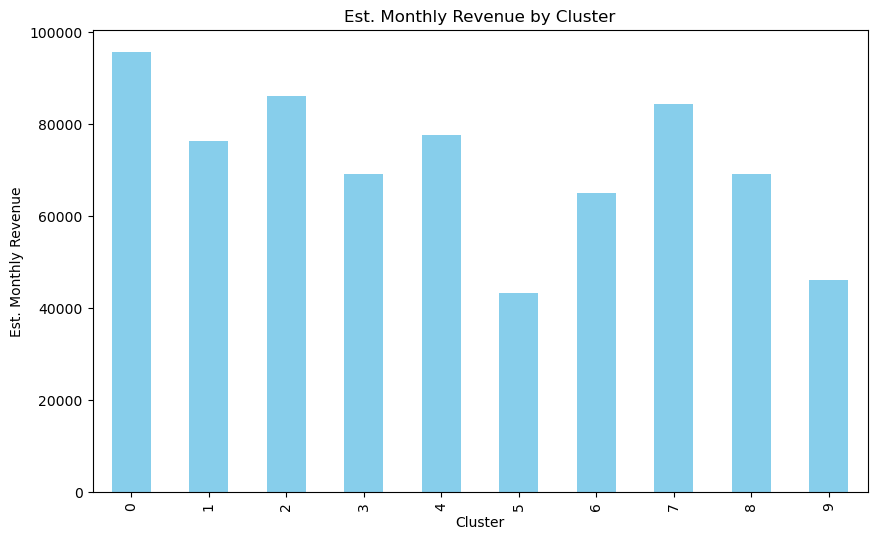

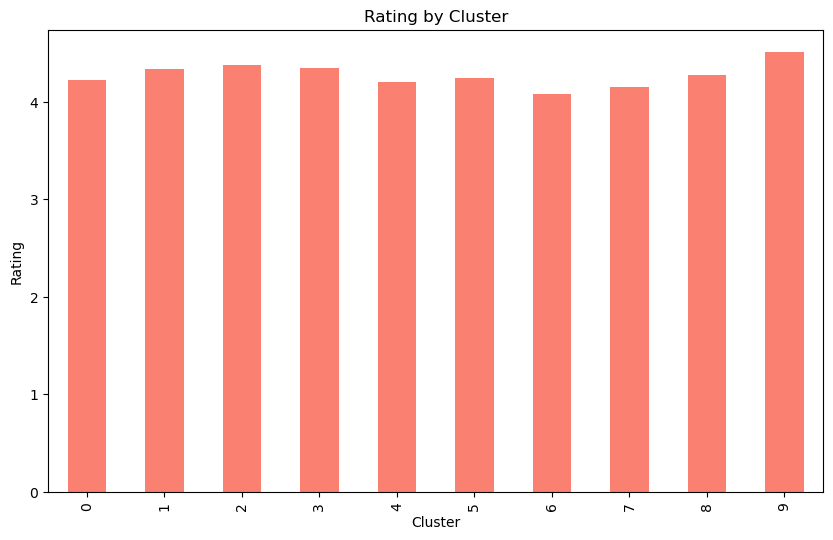

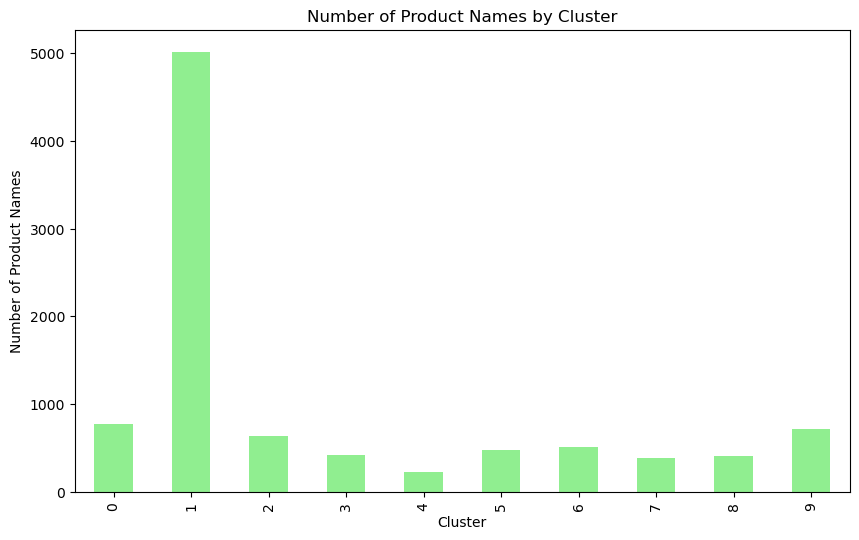

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


# Gráfico de barras para Est. Monthly Revenue por Cluster
cluster_summary['Est. Monthly Revenue'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Est. Monthly Revenue by Cluster')
plt.ylabel('Est. Monthly Revenue')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para Rating por Cluster
cluster_summary['Rating'].plot(kind='bar', figsize=(10, 6), color='salmon')
plt.title('Rating by Cluster')
plt.ylabel('Rating')
plt.xlabel('Cluster')
plt.show()

# Gráfico de barras para la cantidad de Product Names por Cluster
cluster_summary['Product Name'].plot(kind='bar', figsize=(10, 6), color='lightgreen')
plt.title('Number of Product Names by Cluster')
plt.ylabel('Number of Product Names')
plt.xlabel('Cluster')
plt.show()


In [38]:
pd.set_option('display.max_rows', None)
df.loc[df['Cluster'] == 6]

,Product Name,Category,Brand,Reviews,LQS,Sellers,Date First Available,Time in Market (days),Rating,Price,Est. Monthly Sales,Est. Monthly Revenue,Keywords,Cluster
15,visgogo baby boy girls oversized sweatshirt ro...,clothing shoes jewelry,visgogo,27,7,1,2023-06-27,122,4.80,14.99,5146.0,80324.54,"[dude, bubble, romper, onesie, sweater, little...",6
21,skard womens letter graphic print college styl...,clothing shoes jewelry,skard,13,7,1,2023-08-29,59,2.50,13.99,1074.0,15025.26,"[pullovers, 1989, college, letter, unisex, sty...",6
30,sherpa jackets for women zip up hoodies tops f...,clothing shoes jewelry,generic,4,7,1,2023-09-03,54,3.50,14.99,1004.0,15049.96,"[coats, jackets, sherpa, sweaters, zip, hoodie...",6
46,yingisfitm toddler baby girl halloween outfit ...,clothing shoes jewelry,yingisfitm,1,7,2,2023-07-11,108,3.00,10.99,1373.0,15089.27,"[pumpkin, 06, crewneck, months, outfit, sweats...",6
59,the childrens place baby and toddler long slee...,clothing shoes jewelry,the childrens place,10,5,1,2023-06-06,143,4.70,6.99,2161.0,15105.39,"[place, childrens, graphic, tshirt, toddler, c...",6
89,chiccrate blouses for women dressy casual 34 l...,clothing shoes jewelry,chiccrate,41,8,1,2023-10-13,14,4.90,11.29,1342.0,15151.18,"[tunic, dressy, blouses, tees, 34, floral, pri...",6
96,baby girl sweatshirt romper fall clothes lette...,clothing shoes jewelry,sejardin,27,6,1,2023-07-04,115,4.30,13.99,1084.0,15165.16,"[sister, romper, matching, crew, letter, outfi...",6
107,cotecram halloween costumes for women 2023 fas...,sports outdoors,cotecram,30,7,1,2023-07-20,99,3.80,17.58,1094.0,15195.66,"[cotecram, cardigan, coats, open, costumes, fa...",6
110,tee shirts womens loose fit fall light weight ...,sports outdoors,gofuly,1,7,2,2023-09-13,44,1.00,12.99,1170.0,15198.30,"[shirts, ethnic, hide, henley, sky, weight, tu...",6
119,its just a bunch of hocus pocus shirts for wom...,clothing shoes jewelry,hqzibec,11,4,1,2023-06-23,126,5.00,14.99,1015.0,15214.85,"[pocus, hocus, just, movie, tee, classic, shir...",6
